# RIASSUNTO TIPOLOGIA DI GRAFICI E INDICI

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("carsharing.csv",delimiter=";",decimal=",",index_col="CarIdentifier")
df[:5]

,TimeFrame,RushHour,PremiumCustomer,Distance,Time
CarIdentifier,,,,,
102,FRAME D,1,1,3.0,7.9
103,FRAME D,1,1,5.3,13.9
105,FRAME D,1,-1,0.4,4.1
110,FRAME D,1,1,2.8,5.0
110,FRAME B,1,-1,2.7,5.6


CarIdentifier      CATEGORICO int64

TimeFrame          NOMINALE object

RushHour           CATEGORICO/NOMINALE int64

PremiumCustomer    CATEGORICO/NOMINALE int64

Distance           NUMERICO float64

Time               NUMERICO float64

### GRAFICO A BARRE O BAR PLOT
Permette di rappresentare meglio  i dati nominali o categorici, calcolare la frequenza oppure fare groupby.sum

questo grafico prendi in input la tabella delle frequenze e mostra sull'asse dellex i valori, su quello delle y le frequenze.

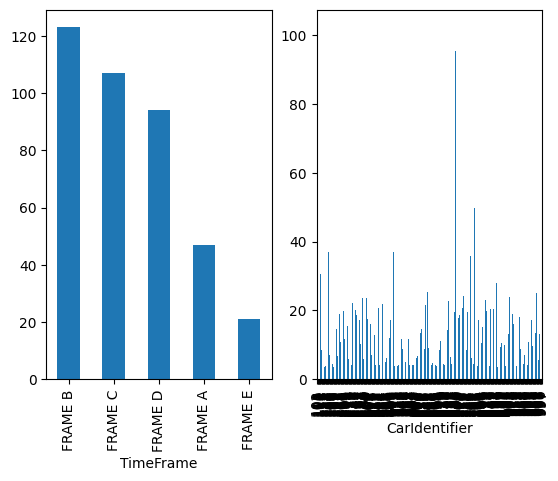

In [3]:
plt.subplot(1,2,1)
df.TimeFrame.value_counts().plot.bar()
plt.subplot(1,2,2)
df.Time.plot.bar()
plt.show()

### ISTOGRAMMA
Suddivide la popolazione in classi e ne rappresenta le frequenze

Mette in risalto:
- simmetria 
- dispersione
- intervalli di concentrazione
- vuoti nei dati
- distacco tra i dati

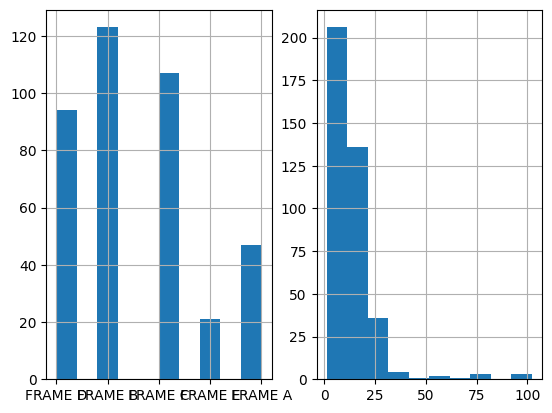

In [4]:
plt.subplot(1,2,1)
df.TimeFrame.hist()
plt.subplot(1,2,2)
df.Time.hist()
plt.show()

### BOXPLOT
Mostra chiaramente come è distribuita la frequenza.
- a linea centrale indica la mediana
- i lati orizzonatali del rettangolo il primo e terzo quantile
- i baffi indicano il terzo quartile - la distanza interquartile e il primo quartile - la distanza interquartile
- i pallini indicano gli outlier

Grafico utile per il colpo d'occhio, permette di individuare il range di variazione

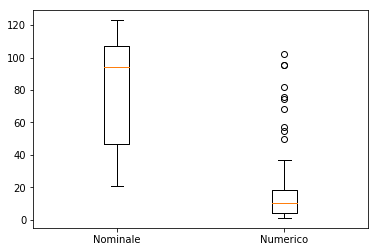

In [48]:
plt.boxplot([df.TimeFrame.value_counts(),df.Time], labels=['Nominale','Numerico'])
plt.show()

### QQ-PLOT
Serve per stimare se dei campioni sono estratti dalla stessa popolazione oppure se la popolazione segue una normale

Rappresenta i quantili della distribuzione

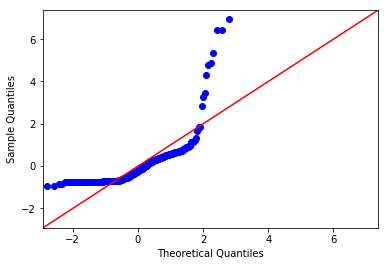

In [59]:
import statsmodels.api as sm
sm.qqplot(df.Time.dropna(), fit=True, line='45')
plt.show()

### GRAFICO di DISPERSIONE
Serve per determinare la relazione tra più attributi di uno stesso dataframe

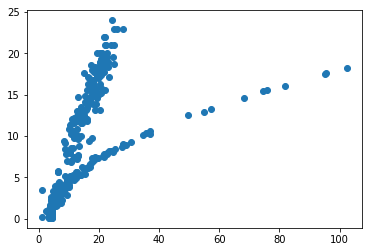

In [61]:
plt.scatter(df.Time,df.Distance)
plt.show()

### ECDF

Permette di evidenziare:
- valori mancanti
- distribuzione unimodale e/o simmetria
- distribuzione asimmetrica a sinistra (mediana < media)
- distribuzione asimmetrica a destra (mediana > media)

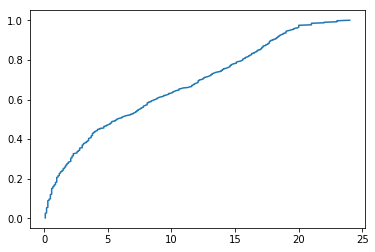

In [70]:
import statsmodels.distributions as dm
dist = dm.ECDF(df.Distance.dropna())
plt.plot(dist.x,dist.y)
plt.show()